<ipython-input-37-303c958251f9>:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  header = pd.read_csv(fn,nrows = 16, delimiter=": ",index_col=1)
<ipython-input-37-303c958251f9>:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  header = pd.read_csv(fn,nrows = 16, delimiter=": ",index_col=1)
<ipython-input-37-303c958251f9>:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  header = pd.read_csv(fn,nrows = 16, delim

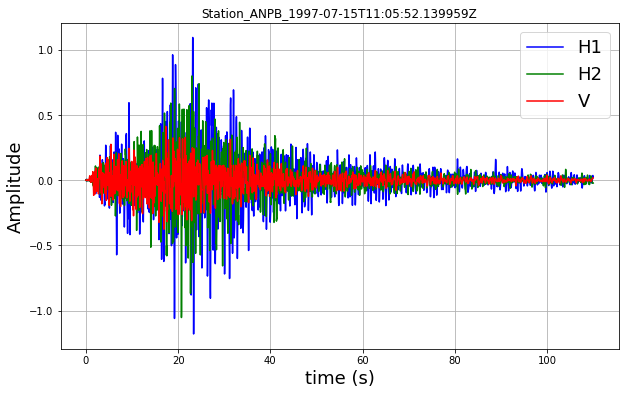

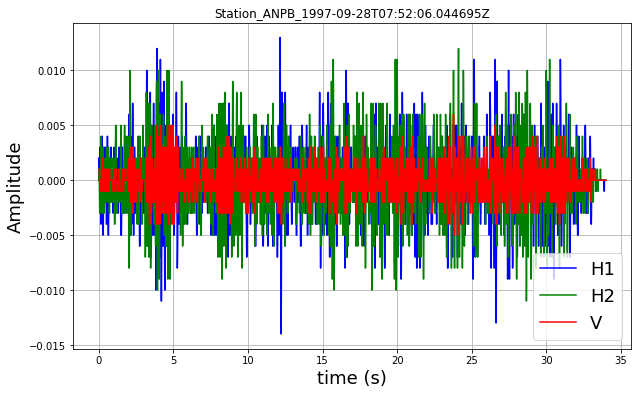

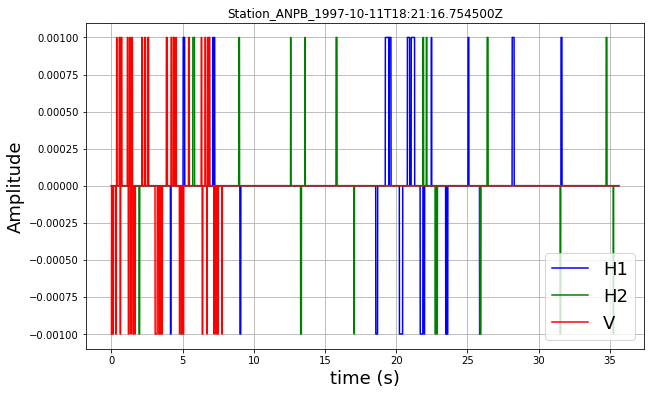

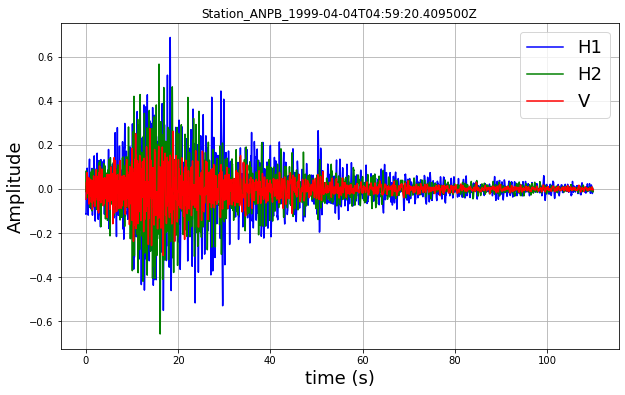

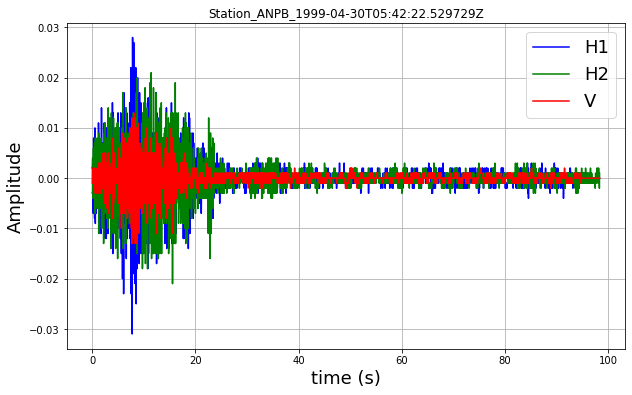

In [37]:
import glob
import obspy
import pandas as pd
from obspy import read
import matplotlib.pyplot as plt

## Path link:
path = "D:/Projects/compare_vel_acc/CWB_data/"
#
files = glob.glob(path+"*.CWB") # all files detect
# Loop for files:
for i in range (0,len(files)):
    fn = files[i] # fake the file name into structres
    # Load the header of file:
    header = pd.read_csv(fn,nrows = 16, delimiter=": ",index_col=1)
    # Load the timeseries
    data = pd.read_csv(fn,delim_whitespace=True,skiprows=17,index_col=False,names=["t","V","H1","H2"])
    data.columns
    time = data.t # time
    vg = data.V   # Z component
    ug1 = data.H1 # E component
    ug2 = data.H2 # H component
    #    print(fn)
    #  plot impulse response of SDOF
    fig, ax = plt.subplots( nrows=1, ncols=1, figsize=(10,6))  # create figure & 1 axis
    ax.plot(time,ug1,'b-', label='H1')
    ax.plot(time,ug2,'g-',  label='H2')
    ax.plot(time,vg,'r-', label='V')
    ax.set_xlabel('time (s)', fontsize=18)
    ax.set_ylabel('Amplitude', fontsize=18)
    ax.legend(fontsize=18)
    ax.grid(which='both')
    #plt.ylim((-1,1))
#    print(header.index[7])
    ax.set_title("Station_"+header.index.name+"_"+header.index[7])
    fig.savefig(fn+".png")   # save the figure to file.
#    plt.close(fig)    # close the figure window
